## Salary Prediction

In [1]:
#load libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('~/Google Drive/Data_analyst_cleaned.csv')

In [3]:
#df.info()

### Data wrangling

In [4]:
# drop irrelavant columns 
df = df.iloc[:,8:]
df.drop(['Company Name', 'Location', 'Headquarters','Competitors', 'max_salary', 'avg_salary', 'headquarters_city', 'desc_len','Min_salary_hr', 'Max_salary_hr', 'avg_salary_hr', 'Rating_groups'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               2252 non-null   float64
 1   Size                 2252 non-null   object 
 2   Founded              2252 non-null   int64  
 3   Type_of_ownership    2252 non-null   object 
 4   Industry             2252 non-null   object 
 5   Sector               2252 non-null   object 
 6   Revenue              2252 non-null   object 
 7   Easy Apply           2252 non-null   object 
 8   Min_salary           2252 non-null   int64  
 9   Max_salary           2252 non-null   int64  
 10  Avg_salary           2252 non-null   float64
 11  Job_state            2252 non-null   object 
 12  Job_city             2252 non-null   object 
 13  Same_state_hq_jl     2252 non-null   int64  
 14  Age                  2252 non-null   int64  
 15  python_jd            2252 non-null   i

In [6]:
#Size 
df.Size = df.Size.astype('string')
#redefining 1-200:small, 201-500:medium, 501-1000:large, 1000+:enterprise
df.loc[df['Size'] == '1 to 50 employees', 'Size'] = 'Small'  
df.loc[df['Size'] == '51 to 200 employees', 'Size'] = 'Small' 
df.loc[df['Size'] == '201 to 500 employees', 'Size'] = 'Medium'
df.loc[df['Size'] == '501 to 1000 employees', 'Size'] = 'Large'
df.loc[df['Size'] == '1001 to 5000 employees', 'Size'] = 'Enterprise'
df.loc[df['Size'] == '5001 to 10000 employees', 'Size'] = 'Enterprise'
df.loc[df['Size'] == '10000+ employees', 'Size'] = 'Enterprise'
df.loc[df['Size'] == '-1', 'Size'] = 'Unknown'
#df.Size.value_counts()
df = df[df['Size'] != 'Unknown'] #based on heatmap, best to drop here

In [7]:
#Ownership_type
df.rename(columns = {'Type_of_ownership':'Ownership_type'}, inplace = True)
df.Ownership_type = df.Ownership_type.astype('string')
df.loc[df['Ownership_type'] == '-1', 'Ownership_type'] = 'Other Organization'
df.loc[df['Ownership_type'] == 'Unknown', 'Ownership_type'] = 'Other Organization'
df.drop('Ownership_type', axis = 1, inplace = True) #as a result of heatmap, it's best to drop here 
#df.Ownership_type.value_counts()

In [8]:
#Industry -- probably omit later 
df.loc[df['Industry'] == '-1', 'Industry'] = 'Others'
df.loc[df.groupby('Industry').Industry.transform('count').lt(5), 'Industry'] = 'Others'
df.Industry = df.Industry.astype('string')
#df.Industry.value_counts()
#len(df.Industry.value_counts())
df.drop('Industry', axis = 1, inplace = True)

In [9]:
#Sector
df.loc[df['Sector'] == '-1', 'Sector'] = 'Others'
df.Sector = df.Sector.astype('string')
#df.Sector.value_counts()
#len(df.Sector.value_counts())

In [10]:
#Revenue 
df.loc[df['Revenue'] == '-1', 'Revenue'] = 'Unknown'
df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = 'Unknown'
df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = 's_size'
df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = 's_size'
df.loc[df['Revenue'] == '$2 to $5 million (USD)', 'Revenue'] = 's_size'
df.loc[df['Revenue'] == '$5 to $10 million (USD)', 'Revenue'] = 's_size'
df.loc[df['Revenue'] == '$10 to $25 million (USD)', 'Revenue'] = 's_size'
df.loc[df['Revenue'] == '$25 to $50 million (USD)', 'Revenue'] = 's_size'
df.loc[df['Revenue'] == '$50 to $100 million (USD)', 'Revenue'] = 's_size'

df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = 'm_size'
df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = 'm_size'
df.loc[df['Revenue'] == '$1 to $2 billion (USD)', 'Revenue'] = 'm_size'
df.loc[df['Revenue'] == '$2 to $5 billion (USD)', 'Revenue'] = 'm_size'
df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = 'm_size'

df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = 'l_size'

df.Revenue = df.Revenue.astype('string')
#df.Revenue.value_counts()


In [11]:
#Easy Apply
df.loc[df['Easy Apply'] == '-1', 'Easy Apply'] = '0'
df.loc[df['Easy Apply'] == 'TRUE', 'Easy Apply'] = '1'
df['Easy Apply'] = df['Easy Apply'].astype(str).astype(int)
#df['Easy Apply'].value_counts()


In [12]:
#Job State
df['Job_state'] = df['Job_state'].astype('string')
#df.Job_state.value_counts()

In [13]:
#Job City
#df.loc[df.groupby('Job_city').Job_city.transform('count').lt(10), 'Job_city'] = 'Others'
#df['Job_city'] = df['Job_city'].astype('string')
#df.Job_city.value_counts()
df.drop('Job_city', axis = 1, inplace = True)

In [14]:
#Job Simp
df['job_simp'] = df['job_simp'].astype('string')
#df.job_simp.value_counts()

In [15]:
#Seniority
df.Seniority.value_counts()
df['Seniority'] = df['Seniority'].astype('string')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2251
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               2047 non-null   float64
 1   Size                 2047 non-null   string 
 2   Founded              2047 non-null   int64  
 3   Sector               2047 non-null   string 
 4   Revenue              2047 non-null   string 
 5   Easy Apply           2047 non-null   int64  
 6   Min_salary           2047 non-null   int64  
 7   Max_salary           2047 non-null   int64  
 8   Avg_salary           2047 non-null   float64
 9   Job_state            2047 non-null   string 
 10  Same_state_hq_jl     2047 non-null   int64  
 11  Age                  2047 non-null   int64  
 12  python_jd            2047 non-null   int64  
 13  Sql                  2047 non-null   int64  
 14  aws                  2047 non-null   int64  
 15  visualization        2047 non-null   i

In [17]:
#Convert categorical variables into dummies 
df = pd.get_dummies(data = df, columns=['Size','Sector','Revenue','Job_state', 'job_simp', 'Seniority'], drop_first = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2251
Data columns (total 71 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Rating                                     2047 non-null   float64
 1   Founded                                    2047 non-null   int64  
 2   Easy Apply                                 2047 non-null   int64  
 3   Min_salary                                 2047 non-null   int64  
 4   Max_salary                                 2047 non-null   int64  
 5   Avg_salary                                 2047 non-null   float64
 6   Same_state_hq_jl                           2047 non-null   int64  
 7   Age                                        2047 non-null   int64  
 8   python_jd                                  2047 non-null   int64  
 9   Sql                                        2047 non-null   int64  
 10  aws                     

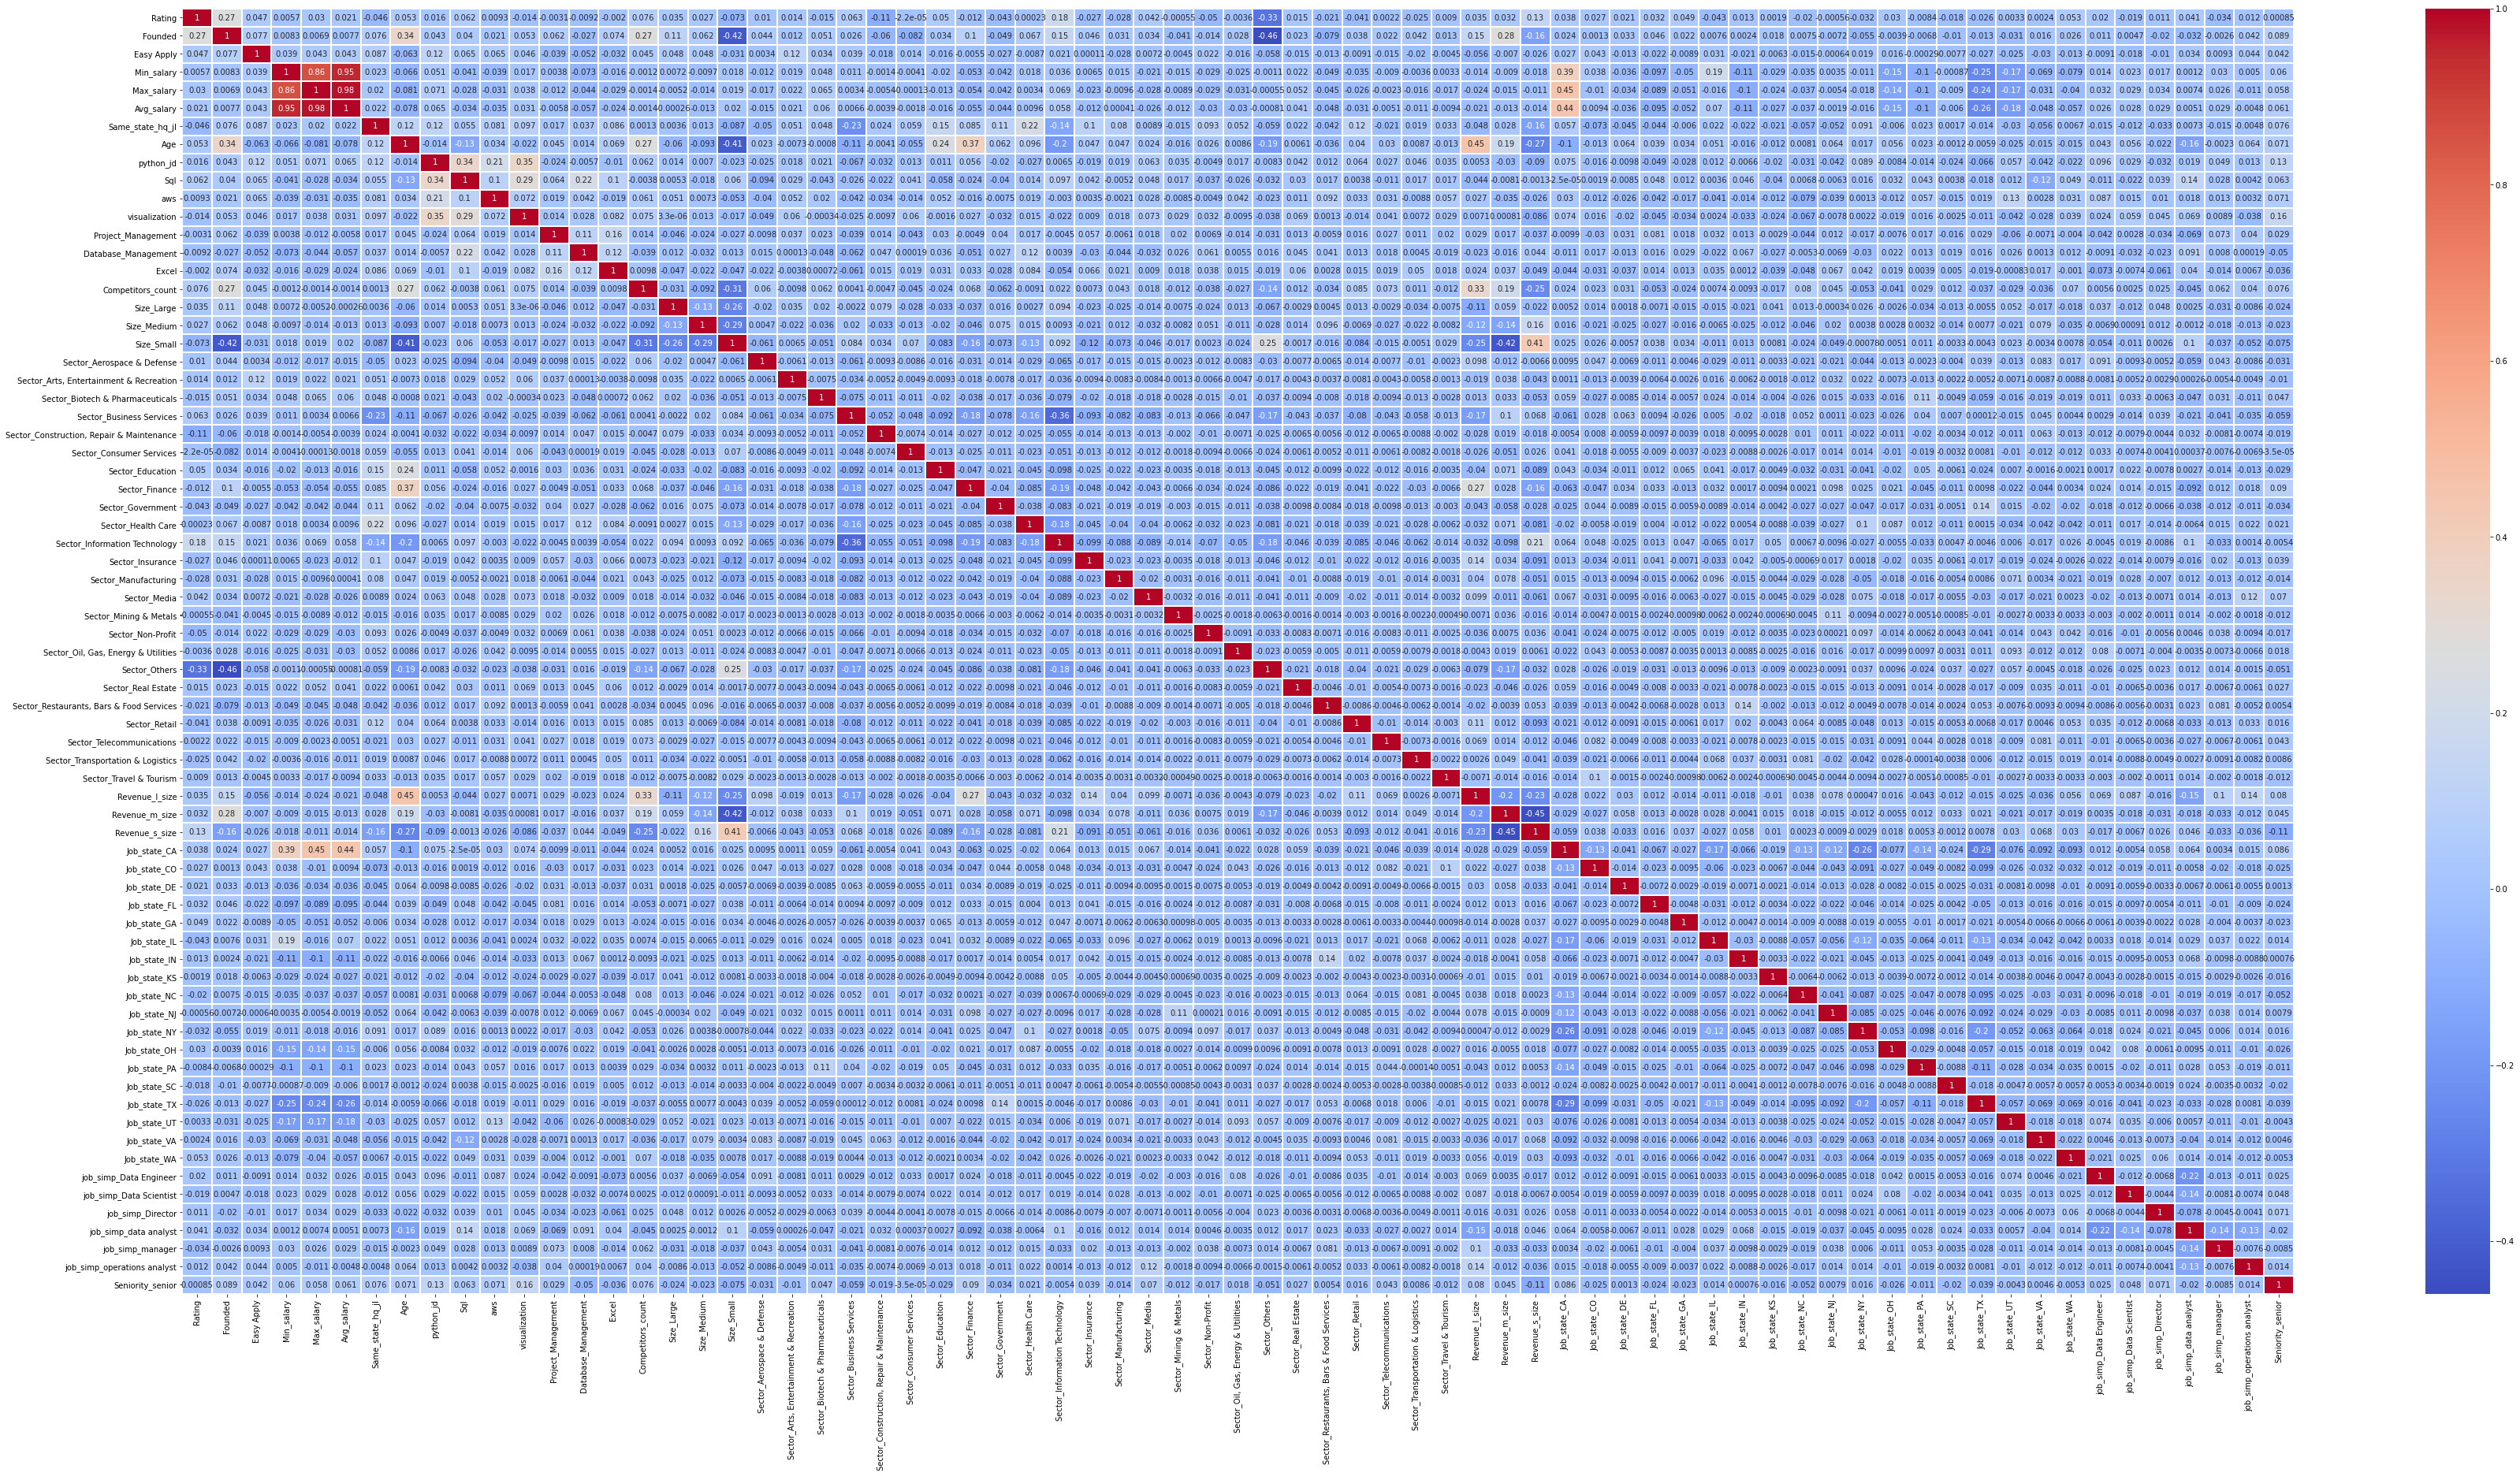

In [19]:
# heat map to observe potential multicolinearity
plt.figure(figsize=(60, 30))
heat_map = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=1)

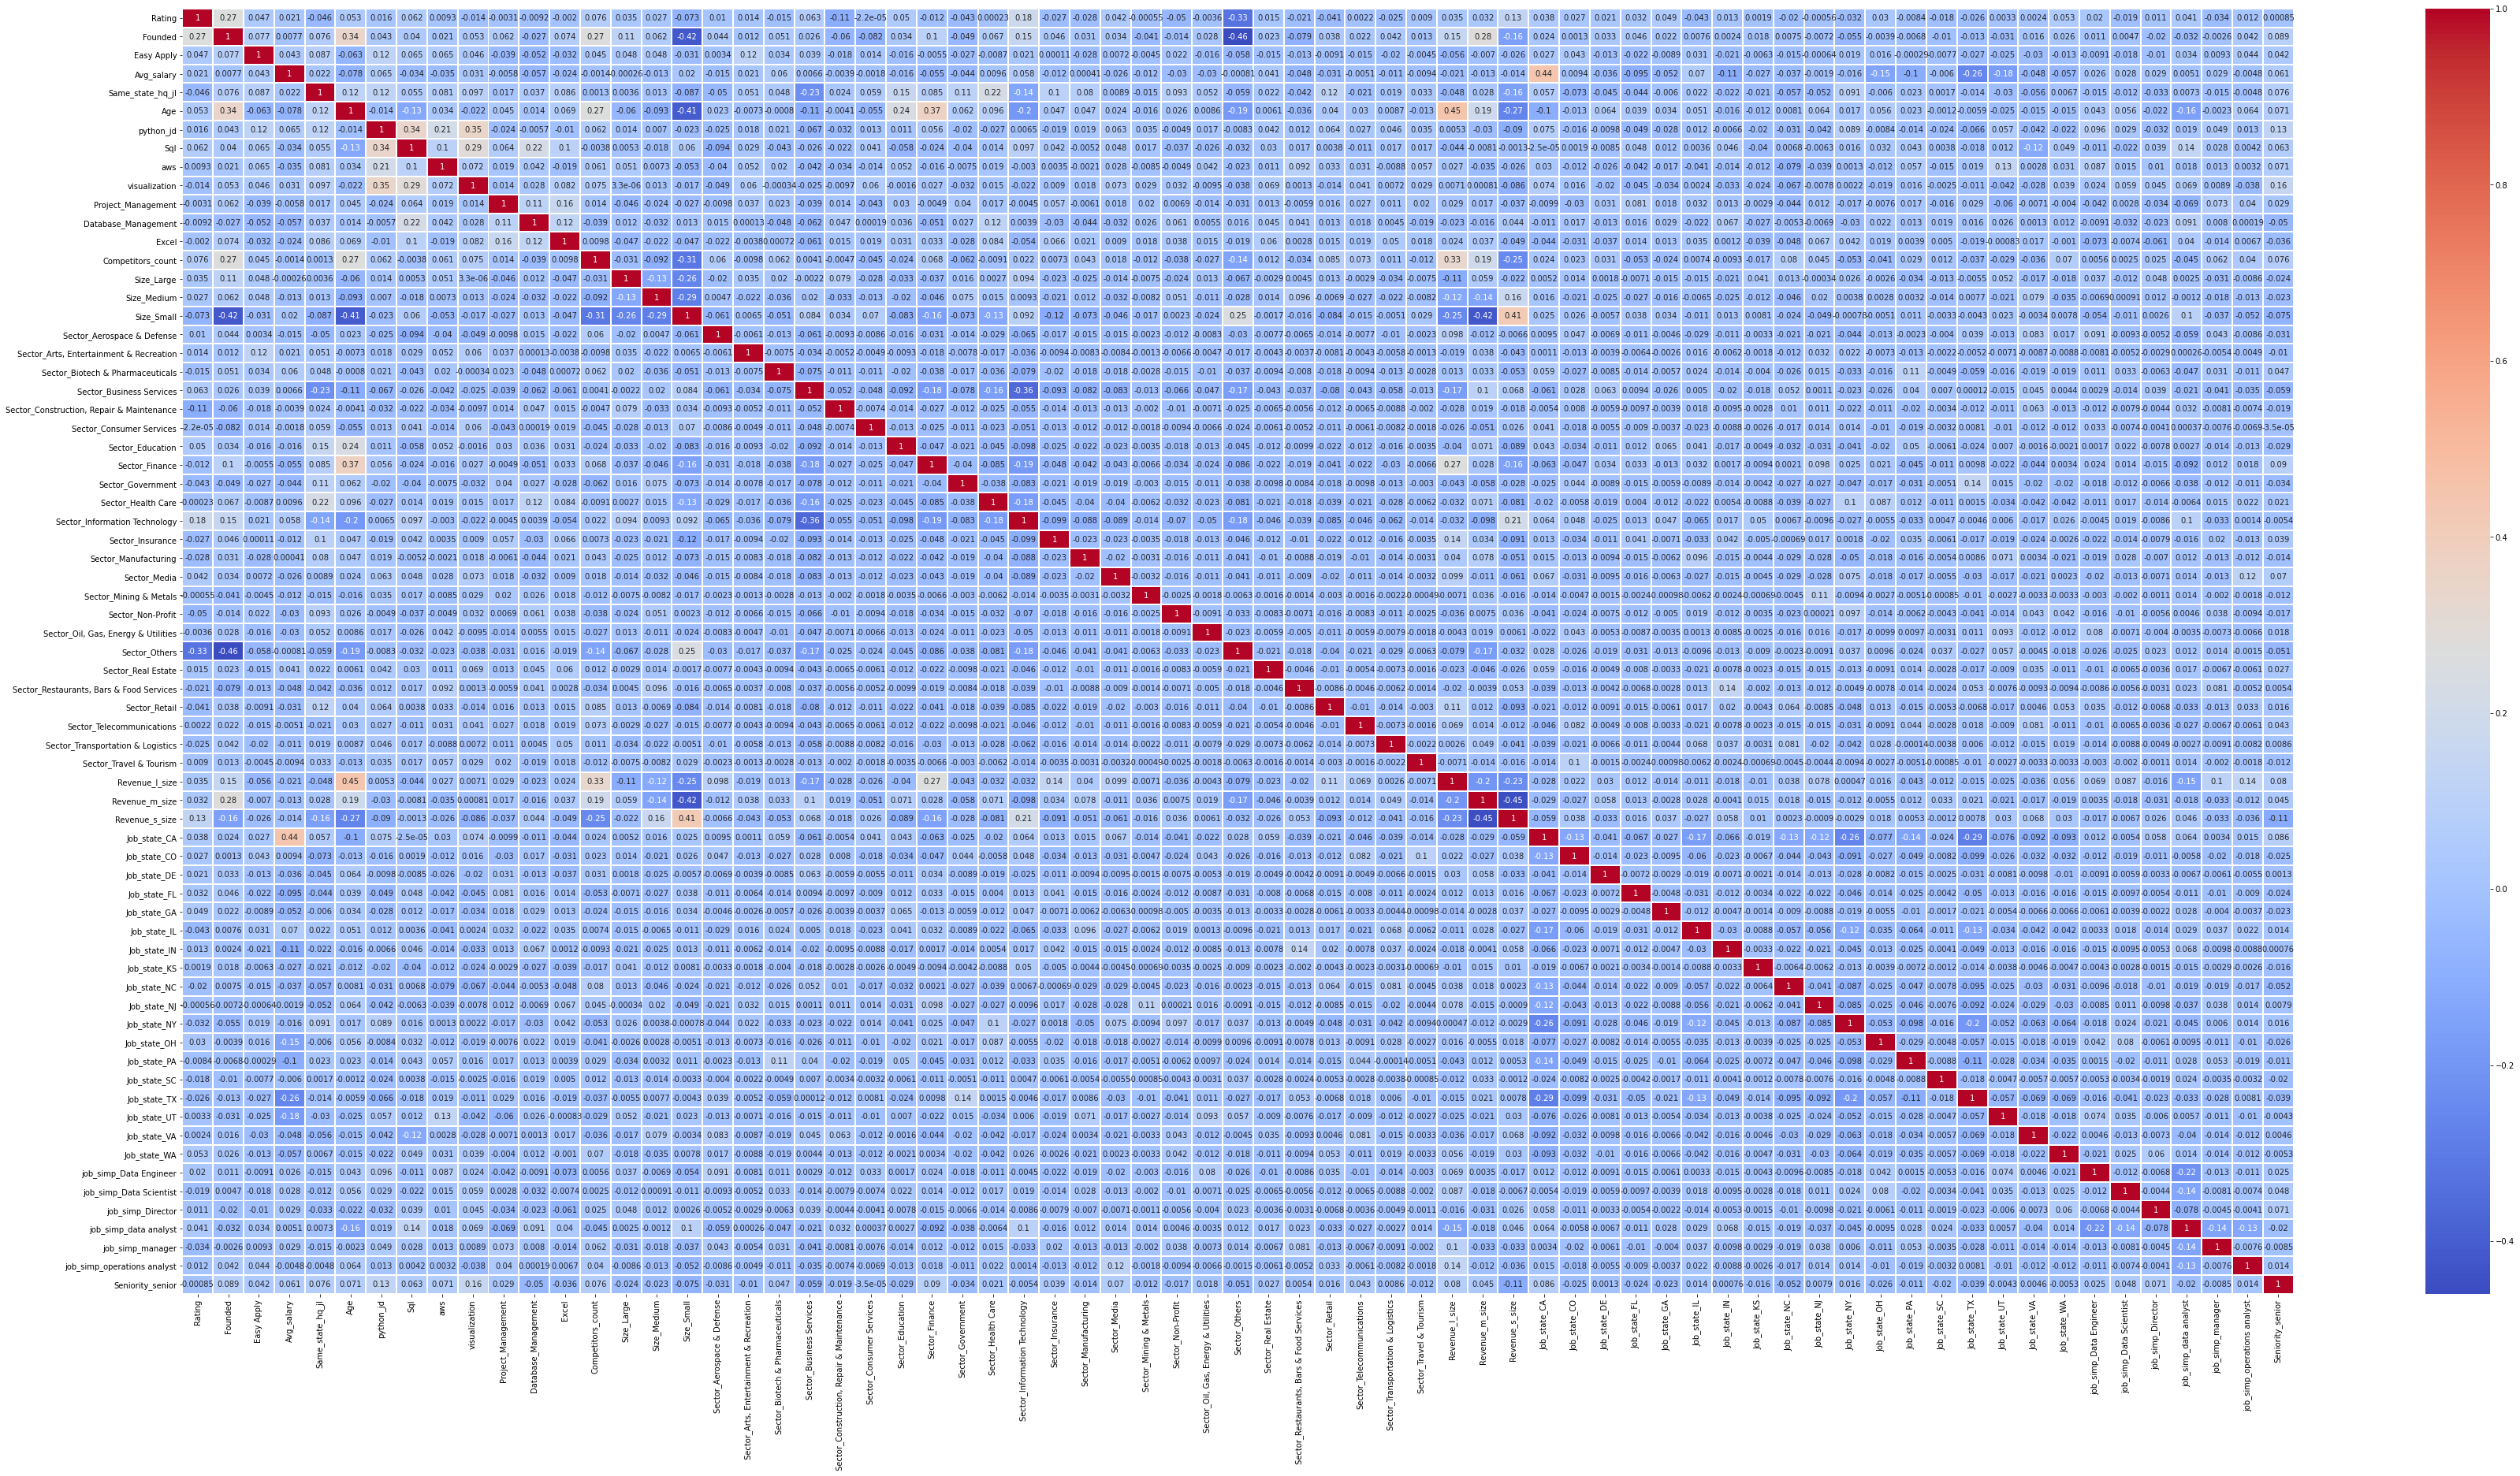

In [20]:
# drop sources of multicolinearity 
df.drop(['Min_salary', 'Max_salary'],axis=1, inplace = True)

plt.figure(figsize=(60, 30))
heat_map = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=1)

## Data Split

In [21]:
#DataFrame for x variables
X_df = df.drop('Avg_salary', axis=1)

#import library
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_df, df.Avg_salary, test_size = 0.2, random_state = 123)


## Models 

In [22]:
# import models 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mean_squared_error(y_test, pred)

425.76179376858806

In [24]:
lasso = Lasso(alpha=.018)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mean_squared_error(y_test, pred)

421.0086513266541

In [25]:
dt = DecisionTreeRegressor(random_state = 10)
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
mean_squared_error(y_test, pred)

728.0337445799457